# Social Networks and Text Analysis - Percolation and Spreading on Network


In [1]:
## Only run this if you are using Google Colab and cannot install new packages
# using your package manager
!pip install python-igraph
!pip install ndlib
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config # If you are using your local machine you will need to install the graphviz package manually
# https://graphviz.org/download/
!pip install pygraphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
import networkx as nx # Library for network analysis
import matplotlib.pyplot as plt # Library for drawing plots
import collections # 
import random # Library for random number generation
import community # Library for community detection
import numpy as np # Library for mathematical and array operations
import numpy.random # Library for random number generation
import pandas as pd # Library for managing dataframes
import matplotlib.colors as mcolors # Library for adding colours to plots
import igraph # Additional library for social network analysis
import seaborn as sns # Library for drawing more plots
import warnings # Library for managing warning messages
import math # Library for mathematical operations
import pygraphviz # Library for visualisting graphs
import pydot # Library for visualisting graphs

warnings.filterwarnings('ignore') # Suppress warning messages generated by function calls


%matplotlib inline

# Percolation example on 2d lattice

This section is inspired by  https://dragly.org/2013/03/25/working-with-percolation-clusters-in-python/ 

In [3]:
from scipy.ndimage import measurements # Import a function from the scientific python
# library to label features in arrays

Text(0.5, 1.0, 'Matrix')

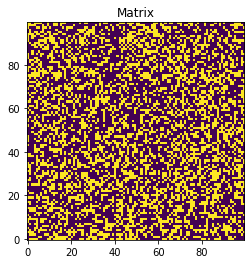

In [21]:
# size of the 2-Dmatrix 
L = 100


# Create a random matrix of the specified size
r = numpy.random.rand(L,L)
# proability to activate
p = 0.4
z = r < p

# Draw a plot of the array
plt.imshow(z, origin='lower', interpolation='nearest')
plt.title("Matrix")


Text(0.5, 1.0, 'Clusters by area')

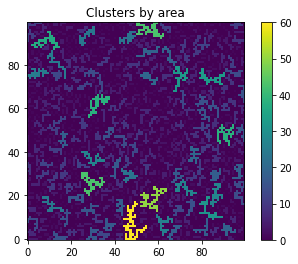

In [35]:
# We label each cluster
lw, num = measurements.label(z) # lw is the labels, num is the number of features

# We measure the size of the different clusters
area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))


areaImg = area[lw]

im3 = plt.imshow(areaImg, origin='lower', interpolation='nearest')
plt.colorbar()
plt.title("Clusters by area")

Text(0, 0.5, '$p_\\infty$')

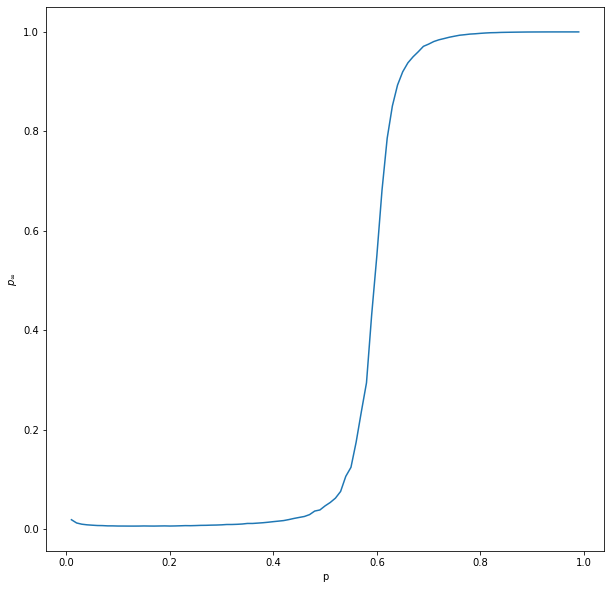

In [6]:
#Question 1c
# Examining how changing thresholds affect the size of the giant component, and
# the probability of a given node being located in that component

L = 100
r = np.random.rand(L,L)
#number of experiments
n = 100

S_compo=[]

# For each threshold between 0 and 1, counting up in increments of 0.1
for p in np.arange(0,1,0.01):
    Size_large_comp=[]
    # For each experiment 
    for k in range(n):
        # Run the experiment as above
        r = np.random.rand(L,L)
        z = r < p
        lw, num = measurements.label(z)
        non_zero=len((z.nonzero())[0])
        area=measurements.sum(z, lw, index=np.arange(lw.max() + 1))
        Size_large_comp.append([max(area)/float(non_zero)])
    #Append the size of the giant component, and threshold value, to a list
    # Size of large component is expressed as the fraction of nodes included
    # in it. 
    S_compo.append([np.mean(Size_large_comp),p])
        
# Convert it to an array so it can be plotted
S_compo=np.array(S_compo)    
    
plt.figure(figsize=(10,10))
plt.plot(S_compo[:,1],S_compo[:,0])
plt.xlabel('p')
plt.ylabel(r'$p_\infty$')

# Giant Componet analysis

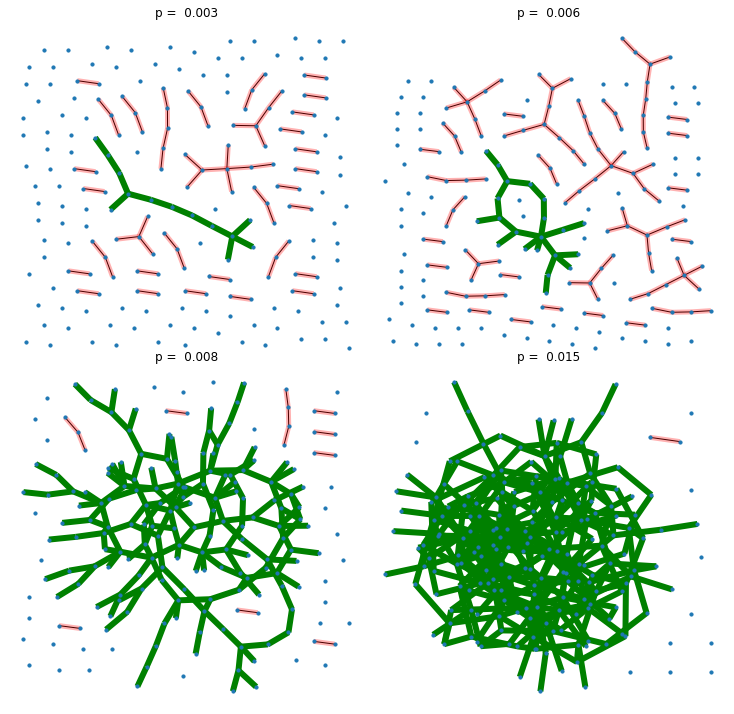

In [7]:
layout = nx.networkx.drawing.nx_agraph.graphviz_layout
n = 200  # 200 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)

# For each value of p that you have chosen - create a graph and draw it whilst
# highlighting the giant component
for p in pvals:
    # 
    G = nx.erdos_renyi_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title("p = %6.3f" % (p))
    nx.draw(G, pos,
            with_labels=False,
            node_size=10
           )
    
    # identify the largest connected component
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw_networkx_edges(G0, pos,
                           edge_color='g',
                           width=6.0
                          )
    
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(G.subgraph(Gi), pos,
                                   edge_color='r',
                                   alpha=0.3,
                                   width=5.0
                                  )


## Fragmentation and resilience analysis

In [8]:
#input: a newtwork graph and the number of sampling
#output: the fraction of nodes removed, GC size, fragmentation size, network diameter 

def fragmentation_attact_random(G_samp,sampling):
  
    # Create a list to fill with output 
    fraction=[]
    for lk in range(0,n_nodes):
        
        # Create lists to fill with variables
        GC_sample=[]
        fragmentation_sample=[]
        diam_sample=[]
        
        # For each sample in the range - return the mean of this to get a good
        # result for each number of nodes being removed
        for samp2 in range(sampling):
            
            
            G=G_samp.copy()
            
            # Remove the nodes
            n_nodesremove=lk
            nodes_to_remove=random.sample(set(G.nodes), n_nodesremove)
            G.remove_nodes_from(nodes_to_remove)
            
            # Giant connected component analysis
            Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
            G0 = G.subgraph(Gcc[0])
            diam_sample.append(nx.diameter(G0))
            GC_sample.append(len(Gcc[0])/n_nodes)
            fragmentation_sample.append(len(Gcc))
            
        fraction.append([lk/n_nodes,np.mean(GC_sample),np.mean(fragmentation_sample),np.mean(diam_sample)])
    fraction=np.array(fraction)
    return fraction

In [52]:
# Set the number of nodes to be included in your graph, as well as the 
# probability of edges forming
n_nodes=100
p_link=0.02

# Create an Erdos-Renyi graph as above
G_erdos = nx.erdos_renyi_graph(n=n_nodes, p=p_link)
# Create a Barabasi-Albert graph
G_barab = nx.barabasi_albert_graph(n_nodes,math.ceil(n_nodes*p_link))

# Set the number of samples to take for each value of nodes removed
sampling=100

# Run the function we've defined to produce results for the two graphs
fraction_erdos=fragmentation_attact_random(G_erdos,sampling)
fraction_barab=fragmentation_attact_random(G_barab,sampling)


Text(0.5, 0, 'Fraction of nodes removed')

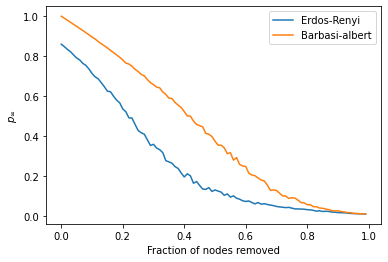

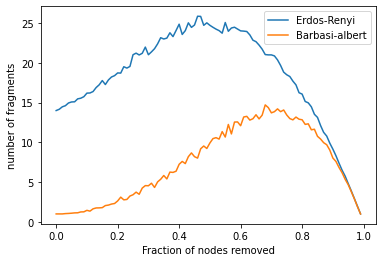

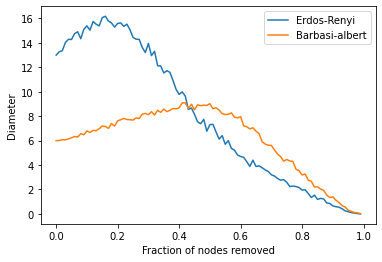

In [10]:
# Plot figures for the results the above function has produced - by doing so we 
# can compare how the different type of graph perform according to different
# fractions of nodes removed 

plt.figure()
plt.plot(fraction_erdos[:,0],fraction_erdos[:,1],label='Erdos-Renyi')
plt.plot(fraction_barab[:,0],fraction_barab[:,1],label='Barbasi-albert')
plt.legend()
plt.ylabel(r'$p_\infty$')
plt.xlabel('Fraction of nodes removed')


plt.figure()
plt.plot(fraction_erdos[:,0],fraction_erdos[:,2],label='Erdos-Renyi')
plt.plot(fraction_barab[:,0],fraction_barab[:,2],label='Barbasi-albert')
plt.legend()
plt.ylabel('number of fragments')
plt.xlabel('Fraction of nodes removed')


plt.figure()
plt.plot(fraction_erdos[:,0],fraction_erdos[:,3],label='Erdos-Renyi')
plt.plot(fraction_barab[:,0],fraction_barab[:,3],label='Barbasi-albert')
plt.legend()
plt.ylabel('Diameter')
plt.xlabel('Fraction of nodes removed')

# SIR (Susceptible, Infected, Removed/Recovered)

We will use the NDLib https://ndlib.readthedocs.io/en/latest/tutorial.html.


I encourage you to write down a function that given a network and the starting parameters: 
\beta, \gamma, fraction_infected and or starting nodes, it will simulate the spreading of the infection and its evolution through the network.

In [11]:
import ndlib.models.epidemics as ep # Library for epidemic modelling 
import ndlib.models.ModelConfig as mc # Library for configuring ndlib models

In [53]:
# Network Definition
n_epidemic = 1000
p_epidemic = 0.1 

g = nx.erdos_renyi_graph(n_epidemic, p_epidemic)


In [13]:
# Create a SIR epidemic model
model = ep.SIRModel(g)

# Model Configuration - set the beta, gamma, and fraction infected parameters
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)


In [14]:
# Simulation - run for 200 iterations
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:01<00:00, 128.22it/s]


no display found. Using non-interactive Agg backend


<Figure size 720x720 with 0 Axes>

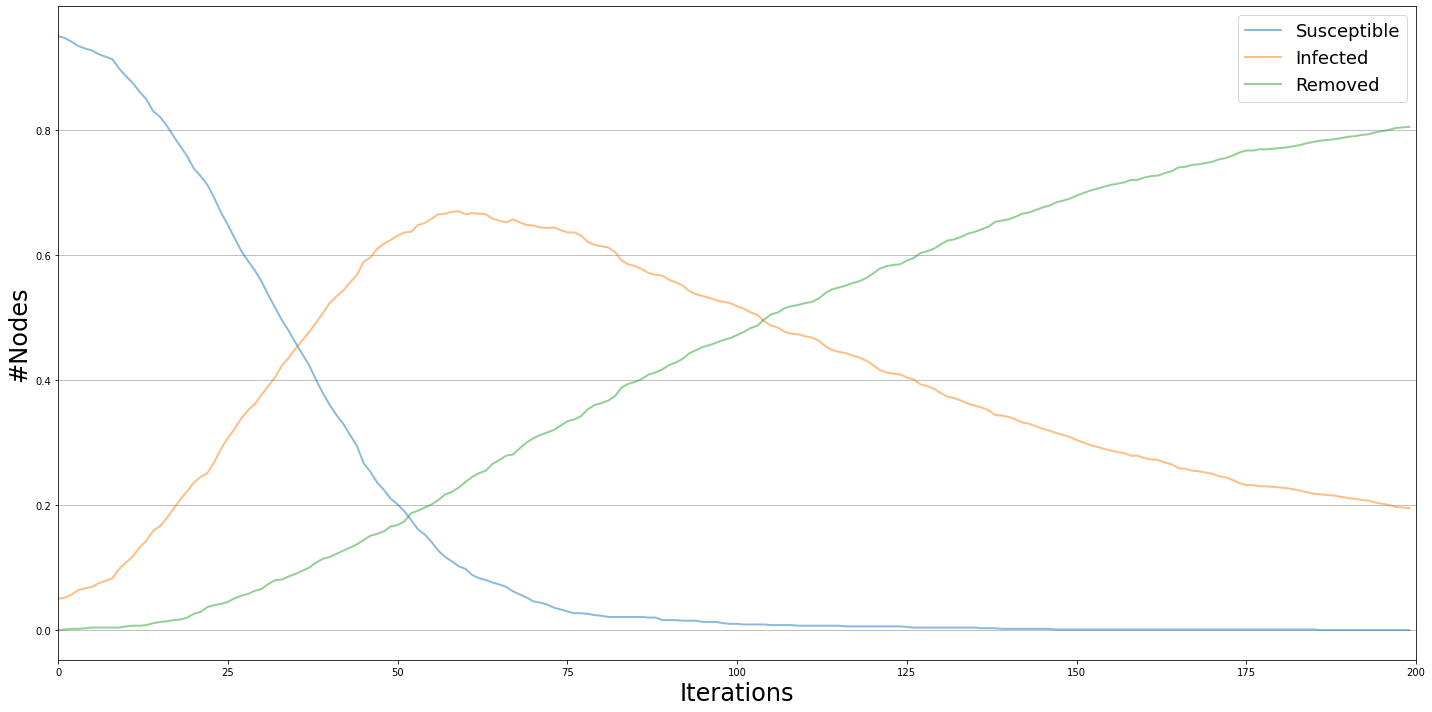

<Figure size 720x720 with 0 Axes>

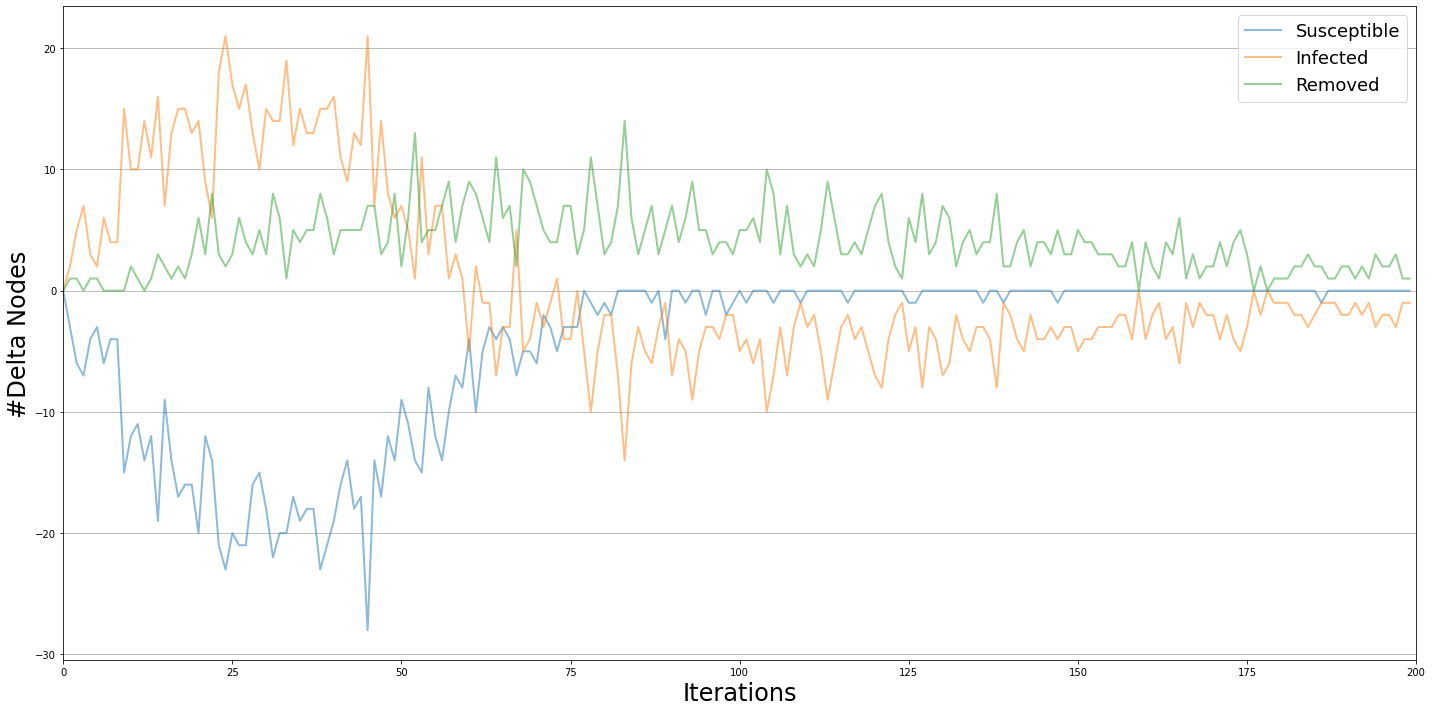

In [15]:
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend # Function for visualising diffusion trends
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence # Function for visualising diffusion Prevalence


# Visualization
viz = DiffusionTrend(model, trends)
plt.figure(figsize=(10,10))
viz.plot()

viz = DiffusionPrevalence(model, trends)
plt.figure(figsize=(10,10))
viz.plot()


  0%|          | 0/200 [00:00<?, ?it/s]

no display found. Using non-interactive Agg backend


100%|██████████| 200/200 [00:01<00:00, 173.95it/s]


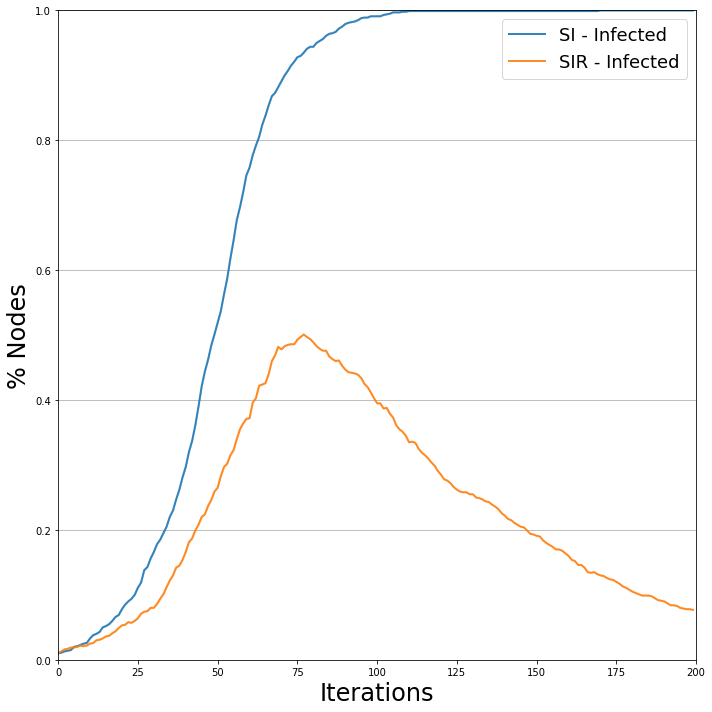

In [16]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison # Function for comparatively visualising diffusion trends

# Network topology
g = nx.erdos_renyi_graph(n_epidemic, p_epidemic)

# Create an SI model (nodes are not removed)
# This runs the same as before - but now we will compare the two models and see
# the differences in difusion between them
model = ep.SIModel(g) 

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001)
cfg.add_model_parameter('gamma', 0.01)
cfg.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

# 2° Model selection
model1 = ep.SIRModel(g)


# 2° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001)
cfg.add_model_parameter('gamma', 0.02)
cfg.add_model_parameter("fraction_infected", 0.01)
model1.set_initial_status(cfg)

# 2° Simulation execution
iterations = model1.iteration_bunch(200)
trends1 = model1.build_trends(iterations)

# Visualization
viz = DiffusionTrendComparison([model, model1], [trends, trends1])
plt.figure(figsize=(10,10))
viz.plot()

In [56]:
# Example of how to create a function to create epidemic model results
def epidemic_model(n = 1000, p = 0.01, beta =  0.001, gamma = 0.01 , 
                   fraction_infected = 0.01, model_type = "SIR", 
                   graph_type = "erdos", iteration_num = 200):
  
  graph_dict = {"erdos" : nx.erdos_renyi_graph(n, p),
                "barabasi": nx.barabasi_albert_graph(n, math.ceil(n*p))}

  G = graph_dict[graph_type]

  model_dict = {"SIR" : ep.SIRModel(G),
                "SI" : ep.SIModel(G)}

  model = model_dict[model_type]

  config = mc.Configuration()
  config.add_model_parameter('beta', beta)
  config.add_model_parameter('gamma', gamma)
  config.add_model_parameter("fraction_infected", fraction_infected)
  model.set_initial_status(config)

  
  # Simulation execution
  iterations = model.iteration_bunch(iteration_num)
  trends = model.build_trends(iterations)

  return model, trends


In [79]:
# Example of how to create a function to plot your results 
def plot_epidemic_model(models, trends, viz_type):

  if viz_type == "Diff_comp":
    assert type(models) is list and type(trends) is list, "You must pass models and trends as a list for a comparitive plot"
    viz = DiffusionTrendComparison(models, trends)
  else:
      visualisation_dict = {"Diff_trend" : DiffusionTrend(models, trends),
                        "Diff_prev" : DiffusionPrevalence(models, trends)}
      viz = visualisation_dict[viz_type]


  plt.figure(figsize=(10,10))
  viz.plot()
